In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle

with open('/content/drive/MyDrive/dm_data/animal_df_acci.pickle', 'rb') as file:
    df = pickle.load(file)

In [ ]:
df = df.reset_index(drop=True)
df

,adoptionStatusCd,age,classification,gender,hitCnt,memo,species,weight
0,2,2.000000,1,2,152,2,2,3.20
1,2,4.000000,1,2,93,2,1,6.60
2,2,0.208333,1,2,92,2,1,2.60
3,2,8.000000,1,2,262,2,2,31.60
4,2,2.000000,1,1,136,2,1,10.00
...,...,...,...,...,...,...,...,...
1950,2,1.000000,2,2,10064,1,2,3.70
1951,2,2.000000,2,1,2947,1,2,4.30
1952,2,0.500000,2,2,1138,1,2,1.89
1953,2,3.000000,2,1,1479,1,2,3.20


# **데이터 타입 확인**

In [ ]:
df.dtypes

,0
adoptionStatusCd,int64
age,float64
classification,object
gender,int64
hitCnt,object
memo,int64
species,int64
weight,float64


In [ ]:
df['classification'] = df['classification'].astype(int)
df['hitCnt']         = df['hitCnt'].astype(int)

In [ ]:
df.dtypes

,0
adoptionStatusCd,int64
age,float64
classification,int64
gender,int64
hitCnt,int64
memo,int64
species,int64
weight,float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
features = df[['age', 'classification', 'gender', 'hitCnt', 'memo', 'species', 'weight']]
target   = df['adoptionStatusCd']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
max_depth = int(input("결정 트리의 최대 깊이를 입력하세요: "))
clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
clf.fit(X_train, y_train)

결정 트리의 최대 깊이를 입력하세요: 5


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.83      0.79       179
           2       0.84      0.76      0.80       212

    accuracy                           0.79       391
   macro avg       0.79      0.80      0.79       391
weighted avg       0.80      0.79      0.79       391



In [ ]:
gini = 1 - sum((np.sum(target == c) / len(target)) ** 2 for c in np.unique(target))
print(f'Gini Index: {gini}')

# 엔트로피 계산
entropy = -sum((np.sum(target == c) / len(target)) * np.log2(np.sum(target == c) / len(target)) for c in np.unique(target) if np.sum(target == c) > 0)
print(f'Entropy: {entropy}')

# 분류 오류 계산
classification_error = 1 - np.mean(y_pred == y_test)
print(f'Classification Error: {classification_error}')

Gini Index: 0.4994807726270759
Entropy: 0.999250783541322
Classification Error: 0.2071611253196931


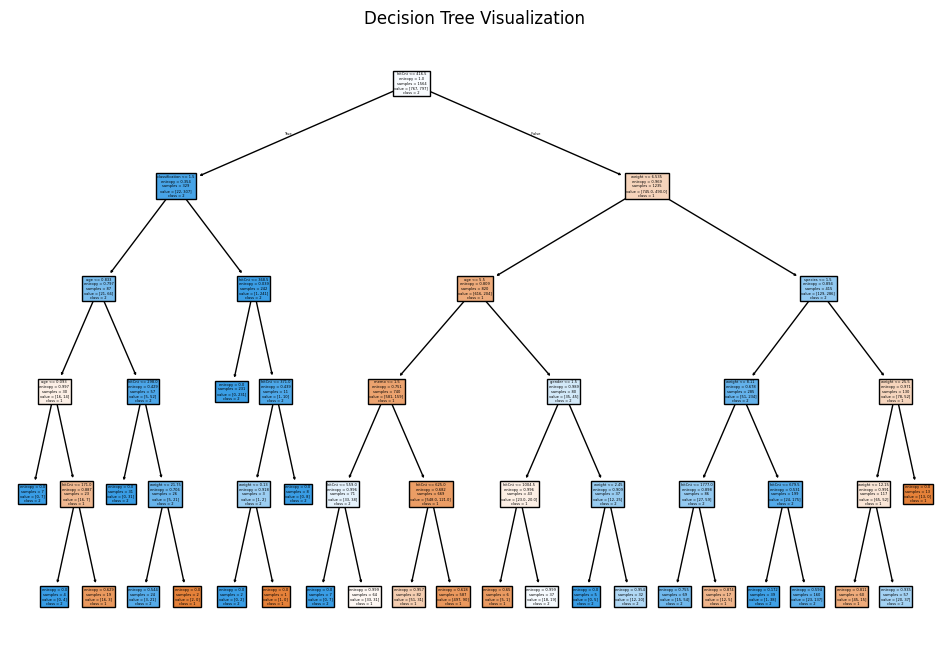

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features.columns, class_names=[str(c) for c in np.unique(target)], filled=True)
plt.title('Decision Tree Visualization')
plt.show()